In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

Завантажуємо датасети

In [2]:
data_train = pd.read_csv('data/train.csv')
data_test = pd.read_csv('data/test.csv')

Розглянемо наші датасети, кількості та вміст колонок, та кількості записів

In [3]:
print(data_train.shape)
data_train.head()

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
print(data_test.shape)
data_test.head()

(418, 11)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Спершу можна сказати, що деякі колонки варто видалити, з огляду на те, що вони місять унікальні (PassengerId, Name, Ticket) або переважно унікальні (Cabin) значення

In [5]:
data_train.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'], inplace=True)
data_test.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'], inplace=True)

Тепер перевіримо, чи містять колонки пропуски

In [6]:
print(data_train.isnull().sum())

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64


In [7]:
print(data_test.isnull().sum())

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64


Заповнюємо відповідіні пропуски модою чи середнім

In [8]:
data_train['Embarked'] = data_train['Embarked'].fillna(data_train['Embarked'].mode()[0])
data_train['Age'] = data_train['Age'].fillna(data_train['Age'].mean())
data_test['Fare'] = data_test['Fare'].fillna(data_test['Fare'].mean())
data_test['Age'] = data_test['Age'].fillna(data_test['Age'].mean())

Візуалізуємо взаємозалежності між колонками (лише для набору train, вважатимемо що для test ситуація схожа, хоча важливо що test не містить колонки survived)

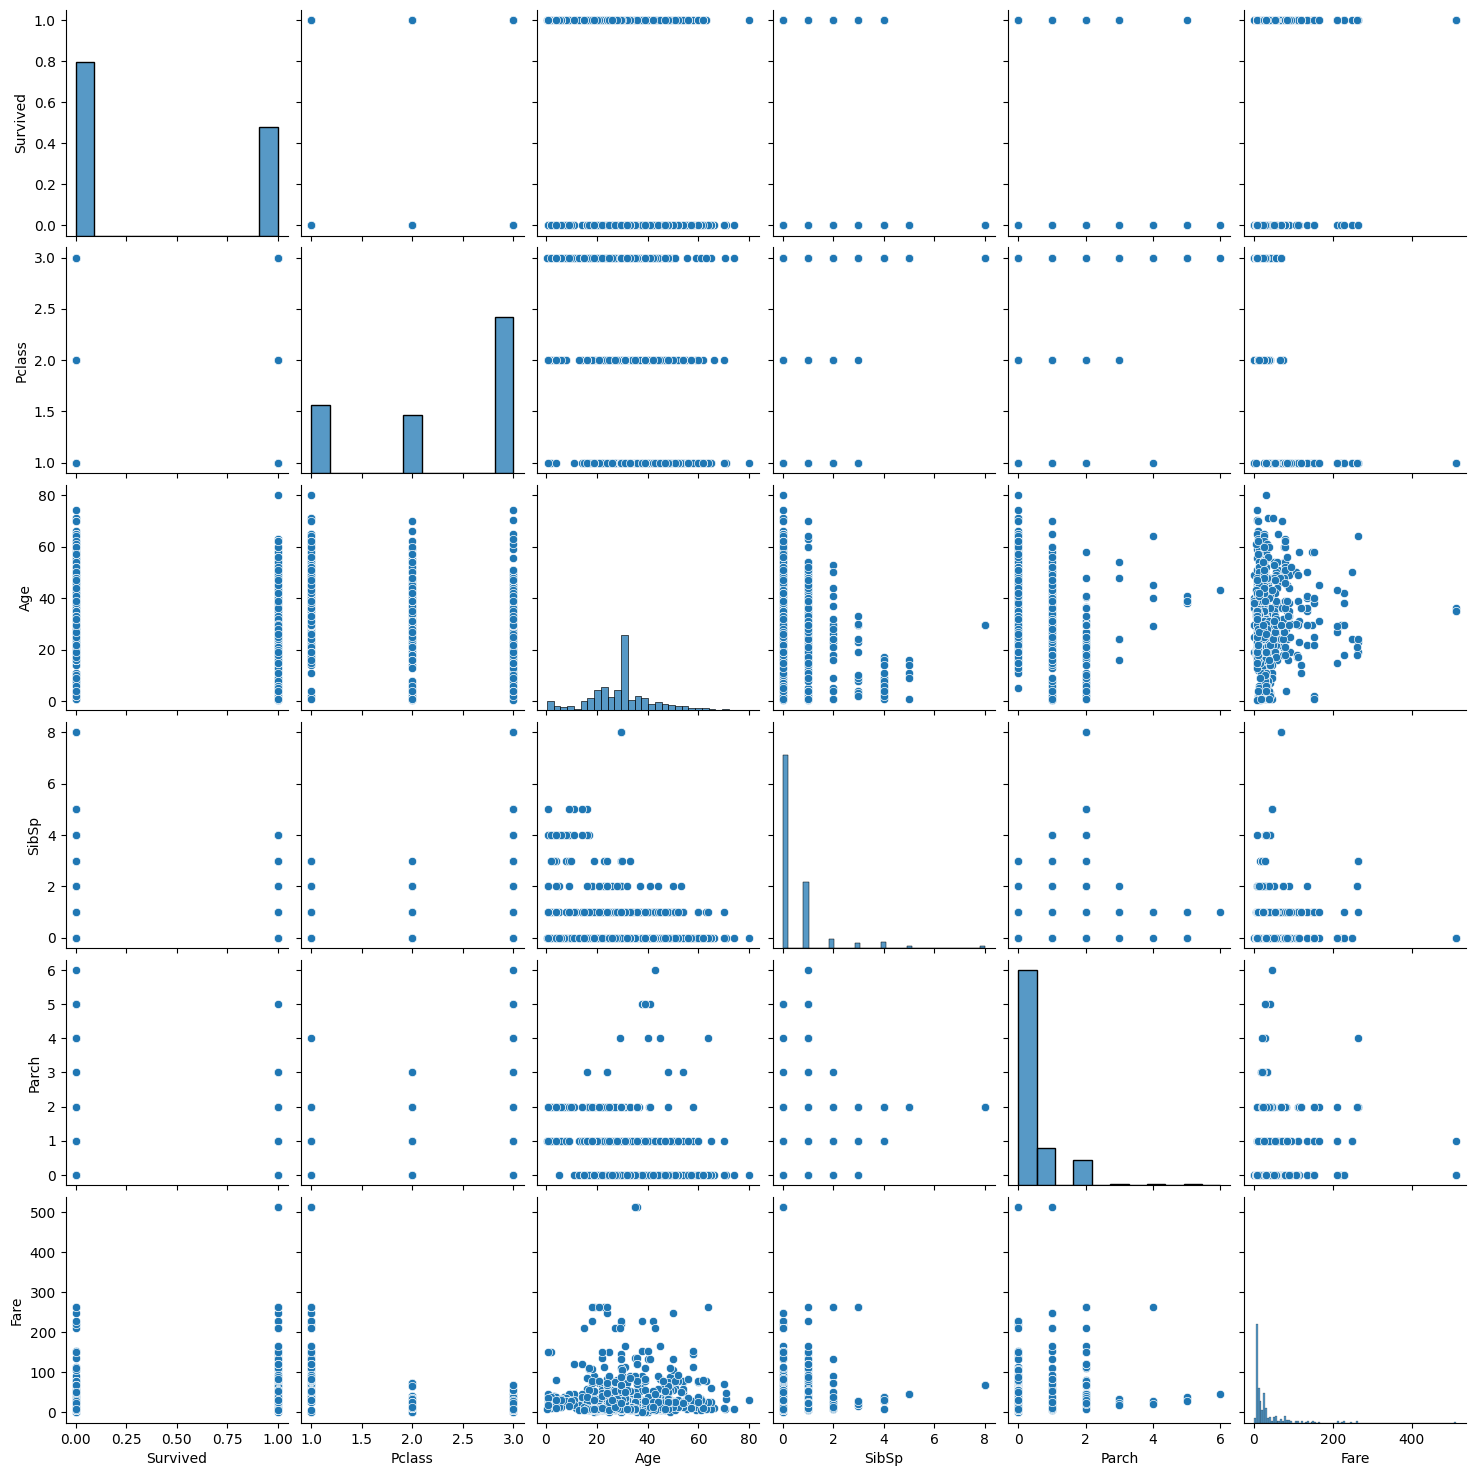

In [9]:
sns.pairplot(data_train)

Закодуємо категоріальні колонки методом One Hot Encoding

In [10]:
data_train = pd.get_dummies(data_train, columns=['Sex', 'Embarked'])
data_test = pd.get_dummies(data_test, columns=['Sex', 'Embarked'])

Детальніший опис даних по колонкам

In [11]:
data_train.describe(include='all')

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891,891,891,891,891
unique,NaN,NaN,NaN,NaN,NaN,NaN,2,2,2,2,2
top,NaN,NaN,NaN,NaN,NaN,NaN,False,True,False,False,True
freq,NaN,NaN,NaN,NaN,NaN,NaN,577,577,723,814,646
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,NaN,NaN,NaN,NaN,NaN
std,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429,NaN,NaN,NaN,NaN,NaN
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,NaN,NaN,NaN,NaN,NaN
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200,NaN,NaN,NaN,NaN,NaN
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,NaN,NaN,NaN,NaN,NaN


Перейдемо до кластерирації даних. Для цього використаємо методи з бібліотеки sklearn, розглянуті на лекціях, а саме K-Means та DBSCAN. Але спершу потрібно остаточно підготувати дані, виконавши їх стандартизацію

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data_train = scaler.fit_transform(data_train)
scaled_data_test = scaler.fit_transform(data_test)

Переходимо до методу K-Means. Для роботи він потребує вказувати кількість необхідних кластерів. Щоб визначити оптимальну кількість, можемо скористатись методом elbow, що обчислює суму квадратів відстаней між точками і центроїдами їх кластерів (інерцію) для різних кількостей кластерів. Зі збільшенням кількості кластерів інерція буде зменшуватись, але точка де зменшення інерції різко сповільниться, відповідатиме оптимальній кількості кластерів

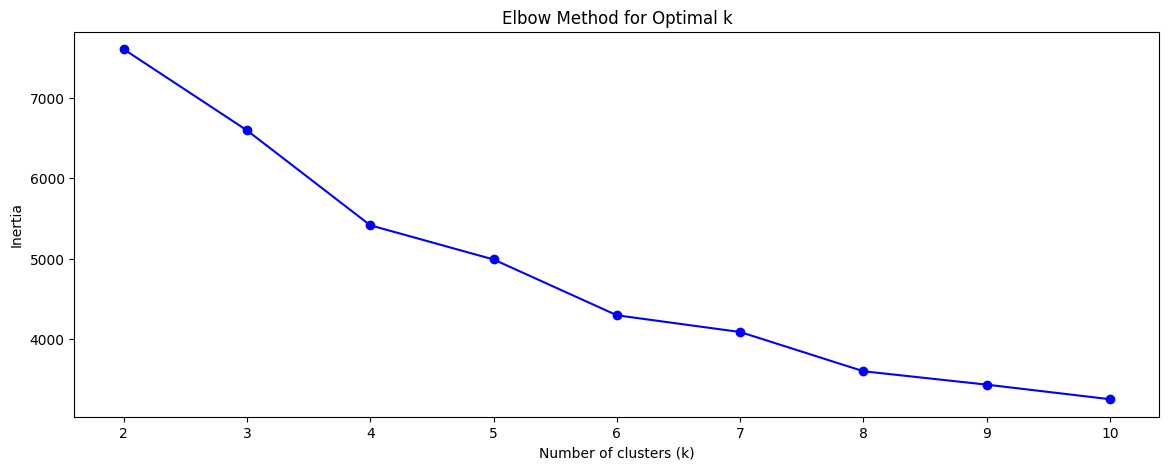

In [13]:
from sklearn.cluster import KMeans

inertia = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data_train)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(14, 5))
plt.plot(k_range, inertia, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

Бачимо перше сповільнення в точці, що відповідає 5 кластерам, вважатимемо що це оптимальна кількість. Отже виконаємо кластеризацію та візуалізуємо результат за допомогою методу головних компонент (PCA)

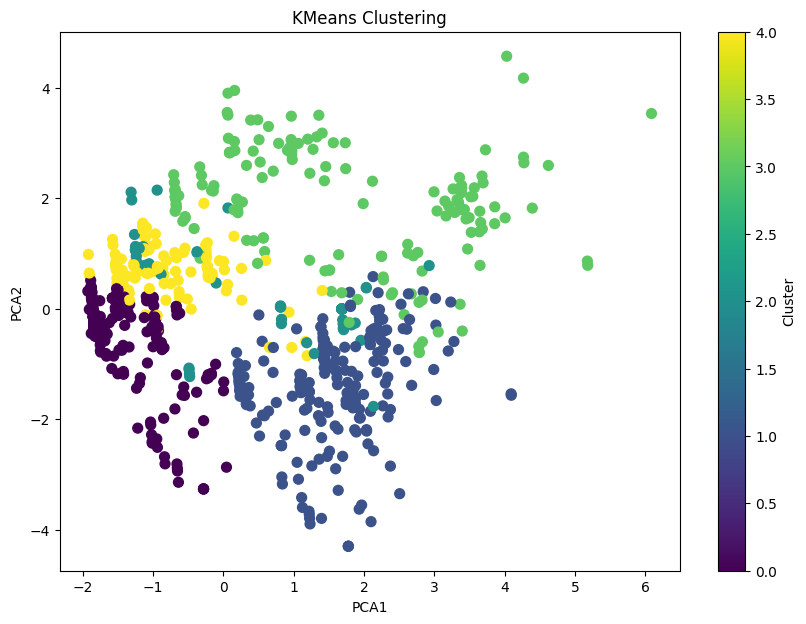

In [14]:
from sklearn.decomposition import PCA
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(scaled_data_train)

data_visual_KMeans = pd.DataFrame()
data_visual_KMeans['Cluster'] = kmeans.labels_

pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_data_train)

data_visual_KMeans['PCA1'] = pca_components[:, 0]
data_visual_KMeans['PCA2'] = pca_components[:, 1]

plt.figure(figsize=(10, 7))
plt.scatter(data_visual_KMeans['PCA1'], data_visual_KMeans['PCA2'], c=data_visual_KMeans['Cluster'], cmap='viridis', s=50)
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('KMeans Clustering')
plt.colorbar(label='Cluster')
plt.show()

Для використання методу DBSCAN необхідно задати параметри eps (радіус кола при визначенні належності точок до одного кластера) та min_samples (мінімальна кількість точок, що може сформувати кластер). 
- min_samples може визначатись кількістю атрибутів таблиці, нехай у нашому випадку це буде 10
- eps можна визначити за допомогою методу k-distance, обчисливши відстані до k-го найближчого сусіда кожної точки, відсортувавши їх в порядку зростання та побудувавши графік. Оптимальне значення eps на ньому буде близько до місця вигину графіку

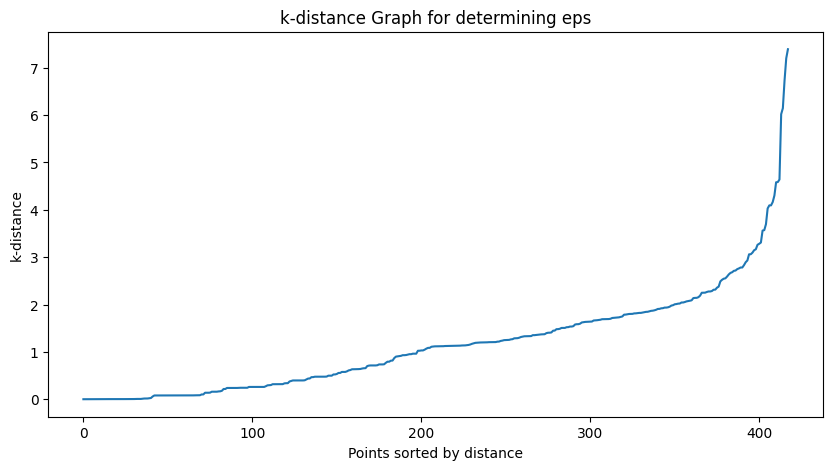

In [15]:
from sklearn.neighbors import NearestNeighbors
k = 9  # min_samples - 1
nearest_neighbors = NearestNeighbors(n_neighbors=k)
neighbors = nearest_neighbors.fit(scaled_data_test)
distances, indices = neighbors.kneighbors(scaled_data_test)
distances = np.sort(distances[:, k-1], axis=0)

plt.figure(figsize=(10, 5))
plt.plot(distances)
plt.xlabel('Points sorted by distance')
plt.ylabel('k-distance')
plt.title('k-distance Graph for determining eps')
plt.show()

Бачимо два вигини, один приблизно на 1.5, другий (більший) приблизно на 2.5. Виконаємо кластеризацію для обох цих значень, і подивимось на кількості побудованих кластерів та кількості точок, що будуть визначені як шум (що є особливістю чього методу кластеризації)

In [16]:
from sklearn.cluster import DBSCAN

cluster = DBSCAN(eps=1.5, min_samples=10).fit(scaled_data_train)
labels = cluster.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
print("Number of clusters: %d" % n_clusters_)
print("Number of noise points: %d" % n_noise_)

Number of clusters: 12
Number of noise points: 136


In [17]:
cluster = DBSCAN(eps=2.5, min_samples=10).fit(scaled_data_train)
labels = cluster.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
print("Number of clusters: %d" % n_clusters_)
print("Number of noise points: %d" % n_noise_)

Number of clusters: 6
Number of noise points: 32


Для eps = 2.5 отримали меншу кількість шуму за меншої кількості кластерів, тобто це значення є більш оптимальним. Важливо, що noise points визначаються як окремий кластер, тому фактично кластерів тут 5, як і у випадку K-means

Знову візуалізуємо результат кластеризації за допомогою PCA

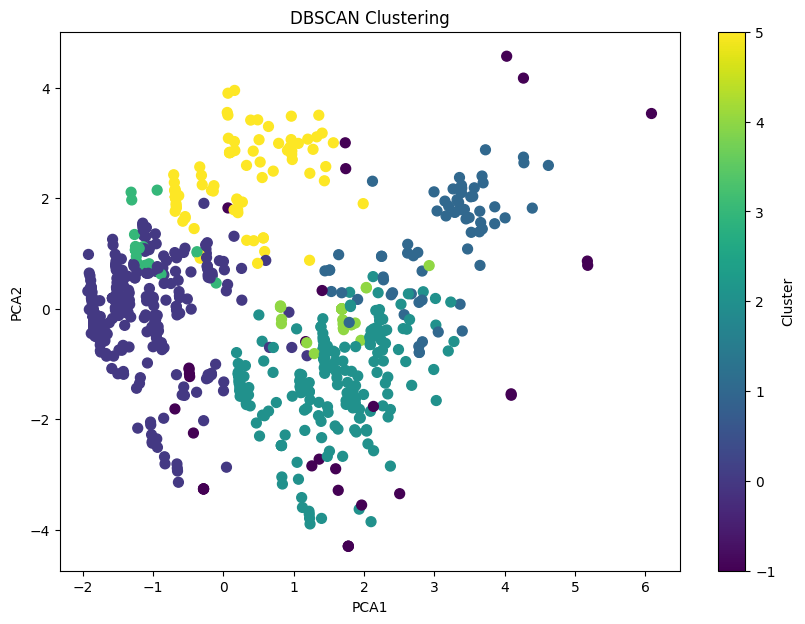

In [18]:
data_visual_dbscan = pd.DataFrame()
data_visual_dbscan['Cluster'] = cluster.labels_

pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_data_train)

data_visual_dbscan['PCA1'] = pca_components[:, 0]
data_visual_dbscan['PCA2'] = pca_components[:, 1]

plt.figure(figsize=(10, 7))
plt.scatter(data_visual_dbscan['PCA1'], data_visual_dbscan['PCA2'], c=data_visual_dbscan['Cluster'], cmap='viridis', s=50)
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('DBSCAN Clustering')
plt.colorbar(label='Cluster')
plt.show()